In [38]:
from utils import geotiff_linear_units
import numpy as np
import geopandas as gpd

import rasterio
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import json

# Datasets

In [35]:
##### Warren County...
# path to dem
warren_dem_path = r'../data/warren/dem_single_warren.tif'

# path to geologic map
warren_geo_path = r'../data/warren/geo_warren.tif'

# path to geologic map integer metadata
warren_geo_meta = r'../data/warren/geo_warren.json'


##### Hardin County
# path to dem
hardin_dem_path = r'../data/hardin/dem_single_hardin.tif'

# path to geologic map
hardin_geo_path = r'../data/hardin/geo_hardin.tif'

# path to geologic map integer metadata
hardin_geo_meta = r'../data/hardin/geo_hardin.json'

# Dataset Consistency Reports

In [8]:
##### Warren County Datasets....
with rasterio.open(warren_dem_path) as dem:
    print('Warren County DEM')
    for key, value in dem.meta.items():
        print(f"{key}: {value}")
    print(f"Resolution: {dem.res}")
    print(f"Linear unit: {geotiff_linear_units(dem)}")

with rasterio.open(warren_geo_path) as geo:
    print('\nWarren County Geologic Map')
    for key, value in geo.meta.items():
        print(f"{key}: {value}")
    print(f"Resolution: {geo.res}")
    print(f"Linear unit: {geotiff_linear_units(geo)}")

Warren County DEM
driver: GTiff
dtype: float32
nodata: 3.3999999521443642e+38
width: 22037
height: 18323
count: 1
crs: EPSG:3089
transform: | 5.00, 0.00, 4665290.00|
| 0.00,-5.00, 3570295.00|
| 0.00, 0.00, 1.00|
Resolution: (5.0, 5.0)
Linear unit: US survey foot

Warren County  Geologic Map
driver: GTiff
dtype: uint8
nodata: 0.0
width: 22037
height: 18323
count: 1
crs: EPSG:3089
transform: | 5.00, 0.00, 4665290.00|
| 0.00,-5.00, 3570295.00|
| 0.00, 0.00, 1.00|
Resolution: (5.0, 5.0)
Linear unit: US survey foot


In [9]:
##### Hardin County Datasets....
with rasterio.open(hardin_dem_path) as dem:
    print('Hardin County DEM')
    for key, value in dem.meta.items():
        print(f"{key}: {value}")
    print(f"Resolution: {dem.res}")
    print(f"Linear unit: {geotiff_linear_units(dem)}")

with rasterio.open(hardin_geo_path) as geo:
    print('\nHardin County Geologic Map')
    for key, value in geo.meta.items():
        print(f"{key}: {value}")
    print(f"Resolution: {geo.res}")
    print(f"Linear unit: {geotiff_linear_units(geo)}")

Hardin County DEM
driver: GTiff
dtype: float32
nodata: 3.3999999521443642e+38
width: 45602
height: 46081
count: 1
crs: EPSG:3089
transform: | 5.00, 0.00, 4768395.00|
| 0.00,-5.00, 3890550.00|
| 0.00, 0.00, 1.00|
Resolution: (5.0, 5.0)
Linear unit: US survey foot

Hardin County Geologic Map
driver: GTiff
dtype: uint8
nodata: 0.0
width: 45602
height: 46081
count: 1
crs: EPSG:3089
transform: | 5.00, 0.00, 4768395.00|
| 0.00,-5.00, 3890550.00|
| 0.00, 0.00, 1.00|
Resolution: (5.0, 5.0)
Linear unit: US survey foot


# Dataset Visualizations

## Warren County

### DEM

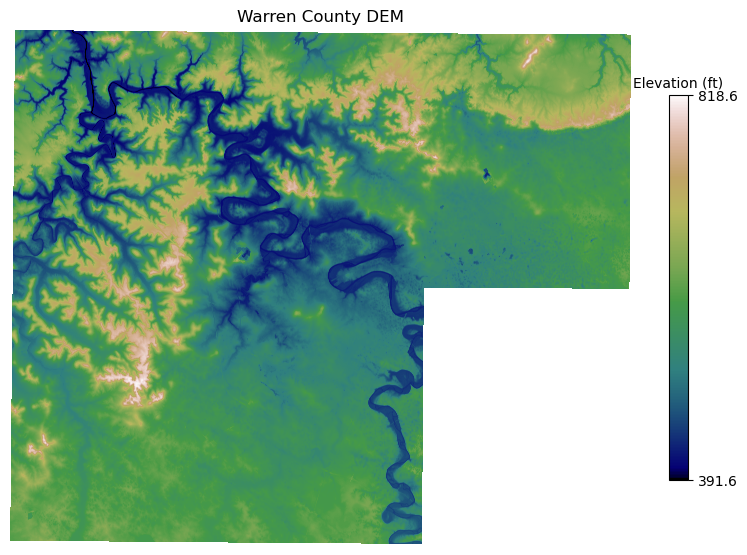

In [34]:
##### Warren County DEM
with rasterio.open(warren_dem_path) as dem:

    data = dem.read(1, masked=True)

    fig, ax = plt.subplots(figsize=(10,10))
    cax = ax.imshow(data, cmap='gist_earth')
    cbar = fig.colorbar(cax, shrink=0.5, ticks=None)
    cbar.set_ticks(ticks=[np.min(data), np.max(data)])
    cbar.ax.set_title('Elevation (ft)', fontdict={'fontsize':10, 'horizontalalignment':'center'})
    ax.set_axis_off()
    ax.set_title('Warren County DEM')
    plt.show()

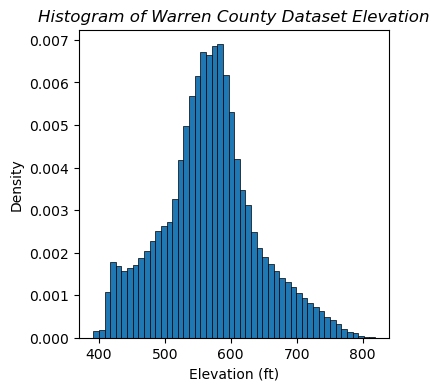

In [64]:
##### Warren County DEM Histogram

fig, ax = plt.subplots(figsize=(4,4))

with rasterio.open(warren_dem_path) as dem:

    data = dem.read(1, masked=True)

    ax.hist(data.flatten(), bins=50, density=True, align='mid', linewidth=0.5, edgecolor='k')
    ax.set_xlabel('Elevation (ft)')
    ax.set_ylabel('Density')
    ax.set_title('Histogram of Warren County Dataset Elevation', style='italic')

    plt.show()

### Surficial Geologic Map

In [126]:
##### Integer-to-Symbol Encoding/Decoding

# open json metadata for map unit to integer mapping
with open(warren_geo_meta, 'r') as geo_meta:
    geo_labels = json.load(geo_meta)

# reverse mapping as integer (key) to map unit (value)
geo_ints = {value:key for key, value in geo_labels.items()}

# define custom rgb colors for map units (from KGS standardized colors)
geo_labels_rgb = {'Qr':(176,172,214), 
                  'af1':(99,101,102), 
                  'Qal':(253,245,164), 
                  'Qaf':(255,161,219), 
                  'Qat':(249,228,101), 
                  'Qc':(214,201,167), 
                  'Qca':(196,157,131)}

# reverse color mapping to integer and rgb percentage (rgb/255)
geo_ints_colors = {geo_labels[key]:tuple(v/255 for v in value) for key, value in geo_labels_rgb.items()}

# create custom color map
cmap = plt.matplotlib.colors.ListedColormap([geo_ints_colors[key] for key in geo_ints.keys()])

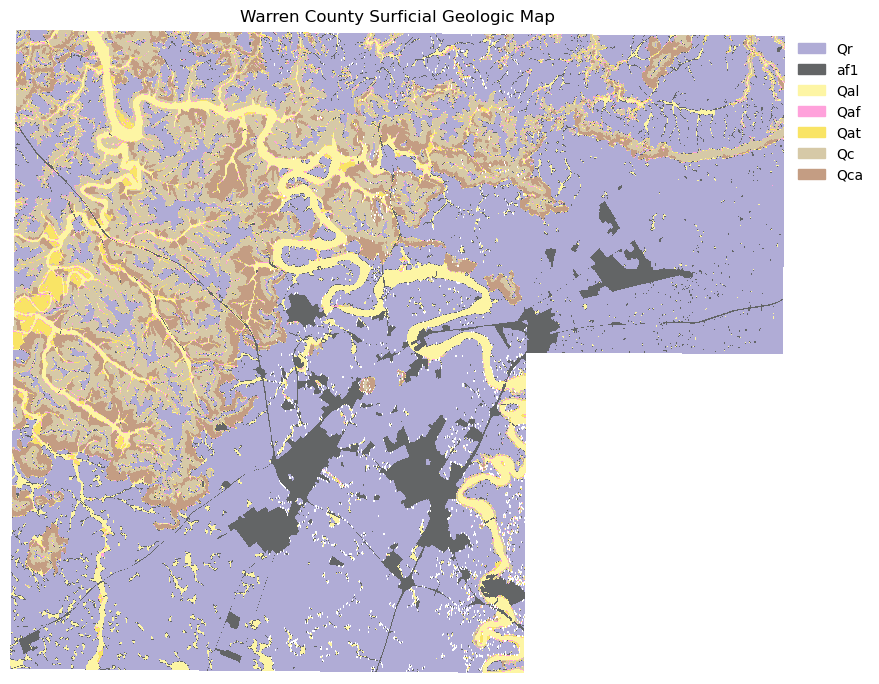

In [66]:
##### Warren County Geologic Map

# open geologic map image and plot...
with rasterio.open(warren_geo_path) as geo:

    # read data (mask nodata values)
    data = geo.read(1, masked=True)

    # plot image...
    fig, ax = plt.subplots(figsize=(10,10))
    cax = ax.imshow(data, cmap=cmap)

    # create custom legend items
    handles = [mpatches.Patch(color=geo_ints_colors[key], label=geo_ints[key]) for key in geo_ints.keys()]
    ax.legend(handles=handles, bbox_to_anchor=(1,1), loc='upper left', frameon=False)

    # adjust plot elements
    ax.set_axis_off()
    ax.set_title('Warren County Surficial Geologic Map')
    plt.show()

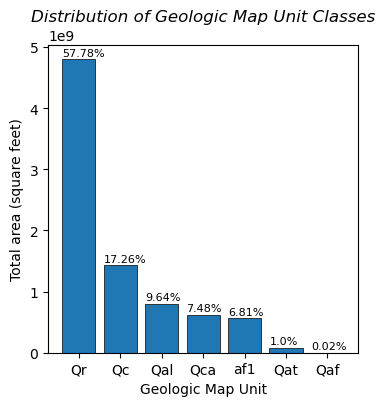

In [127]:
##### Warren County Geologic Map Unit Class Distribution

fig, ax = plt.subplots(figsize=(4,4))

with rasterio.open(warren_geo_path) as geo:

    data = geo.read(1, masked=True).compressed()
    x_res, y_res = geo.res

    int_labels, pixel_counts = np.unique(data, return_counts=True)

    int_counts = dict(zip(int_labels, pixel_counts))

    label_areas = {geo_ints[key]:int_counts[key]*x_res*y_res for key in int_counts.keys()}

    label_areas = dict(sorted(label_areas.items(), key=lambda item: item[1], reverse=True))

    x = range(1, len(label_areas)+1)
    areas = list(label_areas.values())
    percentages = [x/sum(label_areas.values())*100 for x in label_areas.values()]
    tick_labels = [x for x in label_areas.keys()]

    bars = ax.bar(x=x, height=areas, tick_label=tick_labels, align='center', linewidth=0.5, edgecolor='k')


    for bar, per in zip(bars, percentages):
        yval = bar.get_height()
        ax.text(x=bar.get_x(), y=yval+float(0.05e9), s=str(round(per, 2))+'%', fontsize=8)


    ax.set_xlabel('Geologic Map Unit')
    ax.set_ylabel('Total area (square feet)')
    ax.set_title('Distribution of Geologic Map Unit Classes', style='italic')

    plt.show()

## Hardin County

In [ ]:
##### Aggregated statistics of Geologic Map Unit by Area

input_shapefile_path = r'../data/warren/geo_warren.shp'

gdf = gpd.read_file(input_shapefile_path)

gdf['area'] = gdf['geometry'].area

gdf.groupby('Symbol')['area'].agg(['min', 'mean', 'max', 'sum'])

In [ ]:
##### plot histograms of DEM...

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
plt.subplots_adjust(wspace=0.3)

with rasterio.open(warren_dem_path) as dem:

    all_data = dem.read(1)
    masked_data = dem.read(1, masked=True)
    
    ax[0].hist(all_data.flatten(), density=True)
    ax[0].set_title('All Data')
    ax[1].hist(masked_data.flatten(), density=True)
    ax[1].set_title('Valid Data (no-data masked)')

    for idx in range(len(ax)):
        ax[idx].set_xlabel('Elevation (feet)')
        ax[idx].set_ylabel('Density')

    plt.suptitle('Warren County DEM')
    plt.show()

In [ ]:
##### Plot Class Distributions of Geologic Map

with rasterio.open(warren_geo_path) as geo:
    
    labels = geo.read(1)

    unique_labels, counts = np.unique(labels, return_counts=True)

    class_distribution = dict(zip(unique_labels, counts))

    plt.bar(x=range(len(class_distribution)), 
            height=list(class_distribution.values()), 
            tick_label=list(class_distribution.keys()), 
            align='center')

    plt.title('Warren County Geologic Label Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count (pixels)')
    plt.show()